In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from collections import Counter
import itertools

In [55]:
p_grid = np.linspace(0, 1, 20)
prior = np.asarray([1]*20)
likeli = st.binom.pmf(6, 9, p_grid)
numpost = np.multiply(prior, likeli)
denpost = np.sum(numpost)
post = numpost / denpost

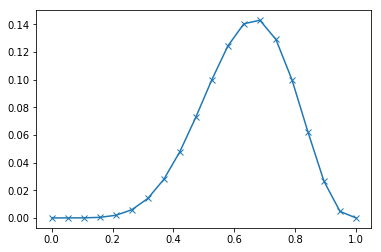

In [56]:
plt.plot(p_grid, post, "-x")
#plt.plot(p_grid, prior, "-x")
plt.show()

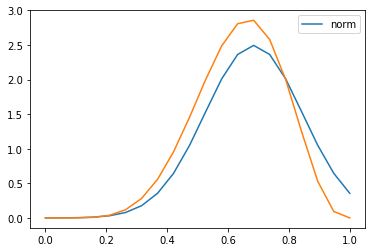

In [57]:
# Laplace Approximation
mu = p_grid[np.argmax(post)]
std = 0.16 # doing Hessian stuff
plt.plot(p_grid, st.norm.pdf(p_grid, mu, std), "-", label="norm")
plt.plot(p_grid, 20*post, "-") # why scale with 20!!??
plt.legend()
plt.show()

In [77]:
# monte carlo
p = np.empty(1000)
p[0] = 0.5
for i in range(1, 1000):
    p_new = st.norm.rvs(size = 1, loc = p[i-1], scale = 0.1)
    if p_new < 0 : p_new = np.abs(p_new)
    if p_new > 1 : p_new = 2 - p_new
    q0 = st.binom.pmf(6, 9, p[i-1])
    q1 = st.binom.pmf(6, 9, p_new)
    p[i] = p_new if q1/q0 > 1 else p[i-1]

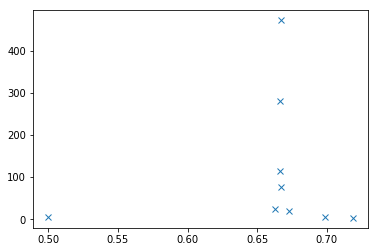

In [129]:
cnts = Counter(p)
denom = sum(cnts.values())
cntlist = np.asarray(cnts.most_common(10))
plt.plot(cntlist[:, 0], cntlist[:, 1], "x")
plt.show()

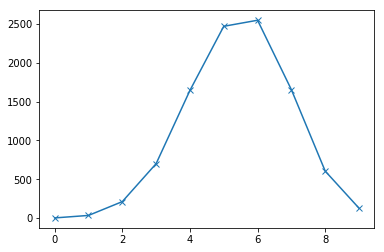

In [142]:
# predictive
w = st.binom.rvs(n = 9, size = 10000, p=0.6)
cntlist = np.asarray(sorted(Counter(w).most_common(10)))
plt.plot(cntlist[:, 0], cntlist[:, 1], "-x")
plt.show()

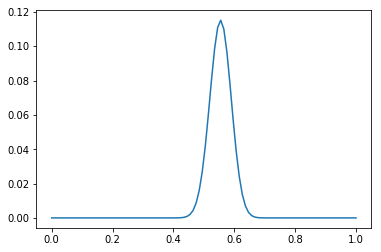

In [148]:
# problem
birth1 = np.asarray([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1])
birth2 = np.asarray([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])
B = np.sum(birth1) + np.sum(birth2)
G = 200 - B
p_grid = np.linspace(0, 1, 100)
prior = np.asarray([1]*100)
likeli = st.binom.pmf(B, 200, p_grid)
numpost = np.multiply(prior, likeli)
denpost = np.sum(numpost)
post = numpost / denpost
plt.plot(p_grid, post, "-")
plt.show()

In [159]:
MAP = p_grid[np.argmax(post)]
# model checking
post_samples = np.random.choice(p_grid, size = 10000, p = post)
W_samples = np.asarray([st.binom.rvs(size = 1, n = 100, p = p)[0] for p in post_samples])

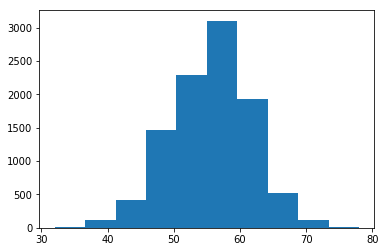

In [160]:
plt.hist(W_samples)
plt.show()

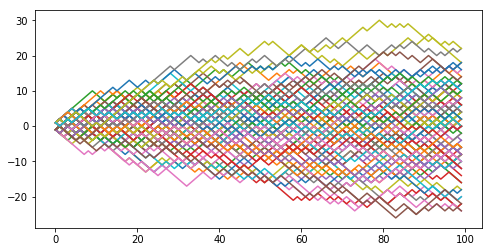

In [176]:
plt.figure(figsize=(8,4))
steps = 100
for _ in range(100):
    samples = np.random.choice([-1,1], size=steps, p = [0.5, 0.5])
    plt.plot(range(steps), list(it.accumulate(samples)), "-")
plt.show()
# getting a normal dist!

In [221]:
# island mcmc
steps = 1000
position = [0]*steps
current = 5
for i in range(steps):
    position[i] = current
    proposal = current + 2*st.binom.rvs(1, 0.5) - 1
    if proposal > 10 : proposal = 1
    if proposal < 1: proposal = 10
    
    prob_move = proposal / current
    if st.uniform.rvs() < prob_move: current = proposal

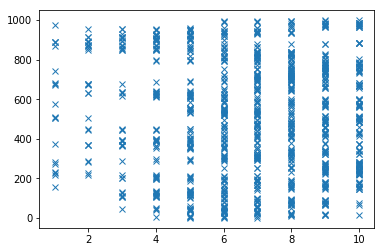

In [222]:
plt.plot(position, range(steps), "x")
plt.show()

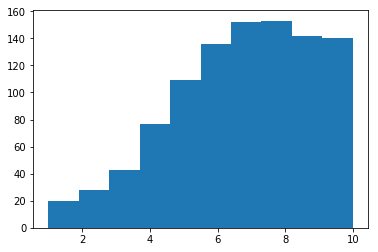

In [223]:
plt.hist(position)
plt.show()

In [55]:
# toy multinoulli model
N = 200 # doc size
V = 100 # corpora size
K = 10 # clusters 

phi = np.empty((K, V))
for k in range(K):
    phi[k] = st.dirichlet.rvs(np.random.random(V))

# can loop the stuff under for D docs
theta = st.dirichlet.rvs(np.random.random(K))
words = np.empty(N)
for n in range(N):
    z = np.random.choice(range(K), 1, p = theta[0])
    words[n] = np.random.choice(range(V), 1, p = phi[z][0])
    
words

array([ 38.,   9.,  99.,  79.,  98.,  21.,  80.,  55.,  74.,  59.,  29.,
        63.,  38.,  48.,  30.,  61.,  45.,  88.,  38.,  25.,  14.,  36.,
        56.,  55.,  28.,   9.,  28.,  21.,  98.,  74.,  84.,  30.,  13.,
        30.,  49.,  98.,  16.,  17.,  61.,  14.,  17.,  59.,  94.,  66.,
        79.,   0.,   1.,  10.,  74.,  12.,  30.,  36.,  81.,  73.,  25.,
        59.,  71.,  59.,  35.,  15.,  10.,  62.,  71.,  30.,  20.,  87.,
         9.,  65.,  74.,  17.,  40.,  10.,  44.,  97.,  58.,  79.,  48.,
        41.,  45.,  17.,  66.,  98.,  11.,  34.,  66.,  48.,  14.,  94.,
        29.,  97.,  62.,  86.,  45.,  66.,  97.,  16.,  22.,  21.,  89.,
         0.,  97.,  60.,  25.,  93.,  28.,   5.,  49.,  45.,  74.,  22.,
        61.,  87.,  96.,  30.,  21.,  41.,  13.,  35.,  71.,   5.,  61.,
        36.,  98.,  92.,  99.,  97.,  89.,  34.,  38.,  36.,  13.,  30.,
        66.,  46.,  39.,   6.,  97.,  38.,  35.,  89.,   4.,  39.,  30.,
        80.,  91.,  15.,  25.,  41.,  13.,  40.,  1

In [62]:
st.dirichlet.rvs([1]*4)

array([[ 0.2993438 ,  0.20188897,  0.15956985,  0.33919738]])